In [25]:
# libraries
import pandas as pd
import numpy as np 
import datetime

# vishualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [26]:
# loading data sets 
accident=pd.read_csv('C:/Users/MSI KATANA/Desktop/DSGP Git Repo/DSGP-GROUP-9/Accidents0514.csv', sep=",", engine='python')
casualty=pd.read_csv('C:/Users/MSI KATANA/Desktop/DSGP Git Repo/DSGP-GROUP-9/Vehicles0514.csv', sep=",",low_memory=False)
vehicle=pd.read_csv('C:/Users/MSI KATANA/Desktop/DSGP Git Repo/DSGP-GROUP-9/CasualtiesUK.csv', sep=",", low_memory=False)

In [27]:
# to get total number of records 
print('Accidents', accident.shape)
print('Casualty', casualty.shape)
print('Vehicle', vehicle.shape)
print('Total Features', accident.shape[1]+casualty.shape[1]+vehicle.shape[1])

Accidents (1640597, 32)
Casualty (3004425, 22)
Vehicle (2216720, 15)
Total Features 69


In [28]:
# to takes time in hh:mm and returns a transformed value between 0-23 (to take the hour of the day)

def hhmm2hh(time):
    if(pd.isnull(time)):
        time='00:00'
    h,m=time.split(":")
    h=int(h)
    m=int(m)
    if((m>=30) and (h!=23)):
        h=h+1
    elif((m>=30) and (h==23)):
        h=0
    else:
        h=h
    return h

In [29]:
# This function takes time in an hour (0-23) 
# from the weekDays in a week and returns 0 or 1 based on the given criterion 
def timeFlagWeekDay(time):
    if(8 <= time <= 20):
        return 1
    else:
        return 

In [30]:
# This function takes time in an hour (0-23) 
# from the weekEnd in a week and returns 0 or 1 based on the given criterion 

def timeFlagWeekEnd(time):
    if(10 <= time <= 20):
        return 1
    else:
        return 0

In [31]:
# Transforms the Time feature from the accident file
accident['Time']=pd.to_numeric(accident['Time'].apply(hhmm2hh))

In [32]:
# The transformation from the Time to Time_Flag 
# In order to transform the Time feature we need to split the accident data into weekEnd and weekDay
accidentWeekEnd=accident[((accident['Day_of_Week']==1) | (accident['Day_of_Week']==7))]
accidentWeekDay=accident[~accident.isin(accidentWeekEnd)].dropna()
accidentWeekEnd=accident[~accident.isin(accidentWeekDay)].dropna()

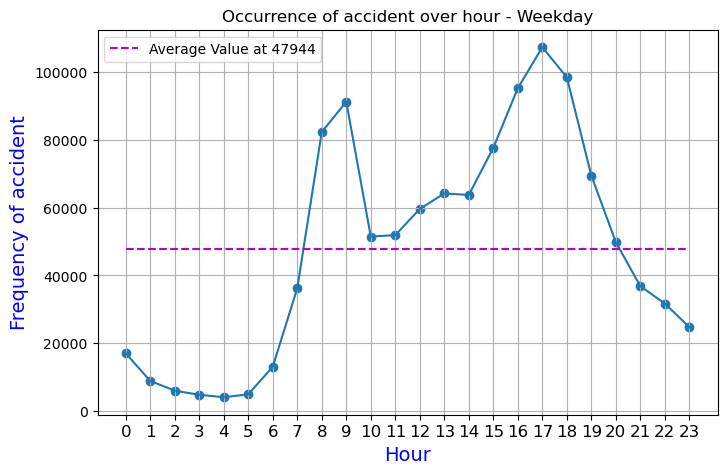

In [33]:
# Time with the WeekDay analysis 
%matplotlib inline
time=pd.DataFrame(accidentWeekDay.groupby(['Time']).count()['Number_of_Casualties']).reset_index()
y=[time['Number_of_Casualties'].mean() for i in range(0,24)]
av='Average Value at ' + str(int(time['Number_of_Casualties'].mean()))
plt.figure(figsize=(8,5))
plt.plot(time['Time'], time['Number_of_Casualties'])
plt.scatter(x=time['Time'], y=time['Number_of_Casualties'])
plt.plot(time['Time'], y, '--m', label=av)
plt.legend(loc='upper left')
plt.title('Occurrence of accident over hour - Weekday')
plt.xlabel('Hour',color='#0000ff', fontsize=14)
plt.ylabel('Frequency of accident', color='#0000ff',fontsize=14)
plt.xticks(range(0,24), fontsize=12)
plt.grid()
plt.show()

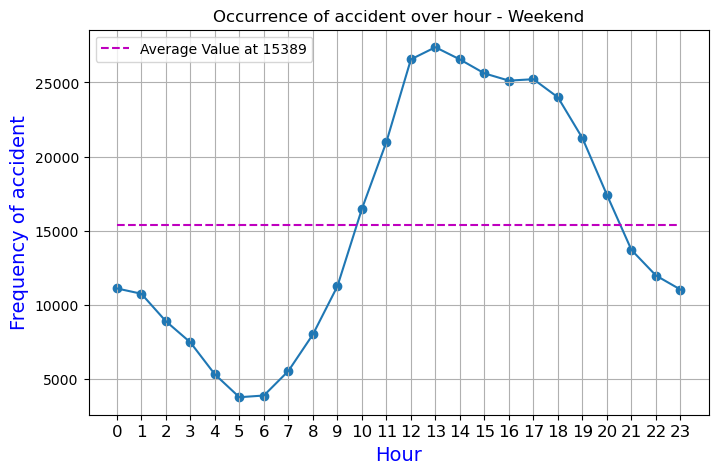

In [34]:
# Time with the WeekEnd analysis 
time=pd.DataFrame(accidentWeekEnd.groupby(['Time']).count()['Number_of_Casualties']).reset_index()
y=[time['Number_of_Casualties'].mean() for i in range(0,24)]
av='Average Value at ' + str(int(time['Number_of_Casualties'].mean()))
plt.figure(figsize=(8,5))
plt.plot(time['Time'], time['Number_of_Casualties'])
plt.scatter(x=time['Time'], y=time['Number_of_Casualties'])
plt.plot(time['Time'], y, '--m', label=av)
plt.legend(loc='upper left')
plt.title('Occurrence of accident over hour - Weekend')
plt.xlabel('Hour', color='#0000ff', fontsize=14)
plt.ylabel('Frequency of accident', color='#0000ff', fontsize=14)
plt.xticks(range(0,24), fontsize=12)
plt.grid()
plt.show()

In [35]:
# Creates a feature TimeFlag and links a transformed values 
accidentWeekEnd['TimeFlag']=accidentWeekEnd['Time'].apply(timeFlagWeekEnd)

In [36]:
# Similarly, for the weekDay Creates a feature TimeFlag and links a transformed values
accidentWeekDay['TimeFlag']=pd.to_numeric(accidentWeekDay['Time'].apply(timeFlagWeekDay))

In [37]:
# Combines the weekDay and weekEnd records 
mrg=[accidentWeekEnd, accidentWeekDay]
dataAccident=pd.concat(mrg)
dataAccident.rename(columns = {"ï»¿Accident_Index": "Accident_Index"}, inplace=True)
dataAccident

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,TimeFlag
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1.0,3.0,2.0,2.0,15/01/2005,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002900,0.0
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1.0,3.0,2.0,5.0,15/01/2005,...,8.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875,1.0
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1.0,3.0,1.0,1.0,16/01/2005,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002835,0.0
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1.0,2.0,1.0,1.0,08/01/2005,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002821,0.0
24,200501BS00029,527380.0,179280.0,-0.166322,51.498062,1.0,3.0,2.0,1.0,29/01/2005,...,5.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002819,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631798,201463DP39614,306110.0,262480.0,-3.376854,52.252424,63.0,3.0,2.0,1.0,11/11/2014,...,0.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,W01000455,1.0
1631799,201463DP39714,306900.0,292370.0,-3.373600,52.521201,63.0,3.0,1.0,2.0,29/12/2014,...,0.0,7.0,1.0,4.0,0.0,0.0,2.0,2.0,W01000488,NaN
1631800,201463DP39814,324470.0,308900.0,-3.118481,52.672499,63.0,3.0,3.0,2.0,03/11/2014,...,0.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,W01000500,1.0
1631802,201463DP40014,303060.0,290240.0,-3.429555,52.501388,63.0,2.0,3.0,4.0,02/12/2014,...,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,W01000453,1.0


In [42]:
print("Columns in 'vehicle':", vehicle.columns)


Columns in 'vehicle': Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')


In [43]:
import pandas as pd

# Assuming you have 'vehicle' and 'dataAccident' DataFrames loaded with your data

# Possible input features for the prediction of the number of casualties are 28,
# and one response feature (number of casualties)
# These all 28 + 1 features are from the accident and vehicle data.
AccidentCols = ['Accident_Index', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Junction_Detail',
                'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
                'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions',
                'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'TimeFlag']

VehicleCols = ['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
                'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
                'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type']

# Merges the selected features
# The Accident_Index was a connector and we do not need it further
data = pd.merge(vehicle[VehicleCols], dataAccident[AccidentCols], on='Accident_Index', how='left').dropna()
data = data.drop_duplicates('Accident_Index')
data = data.drop(['Accident_Index'], axis=1)
data = data.astype(int)

# Display the resulting DataFrame
print(data)


         Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0                        1                   1               3   
1                        1                   1               2   
3                        1                   1               3   
5                        2                   1               1   
7                        1                   1               3   
...                    ...                 ...             ...   
2205472                  1                   1               2   
2205475                  1                   1               1   
2205477                  2                   1               1   
2205478                  2                   1               1   
2205479                  1                   1               1   

         Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  \
0                      1               37                     7   
1                      1               37                     7   
3     

In [44]:
# Distributions of the data based on unique response values of the response feature (Number_of_Casualties)
distribution=data.sort_values(by ='Number_of_Casualties', ascending=True, ignore_index=True)
distribution=data.groupby('Number_of_Casualties')['Number_of_Casualties'].count().reset_index(
    name='counts').sort_values(by ='counts', ascending=False, ignore_index=True)
distribution

,Number_of_Casualties,counts
0,1,1020417
1,2,214907
2,3,61412
3,4,21786
4,5,8016
5,6,3053
6,7,1073
7,8,459
8,9,221
9,10,122


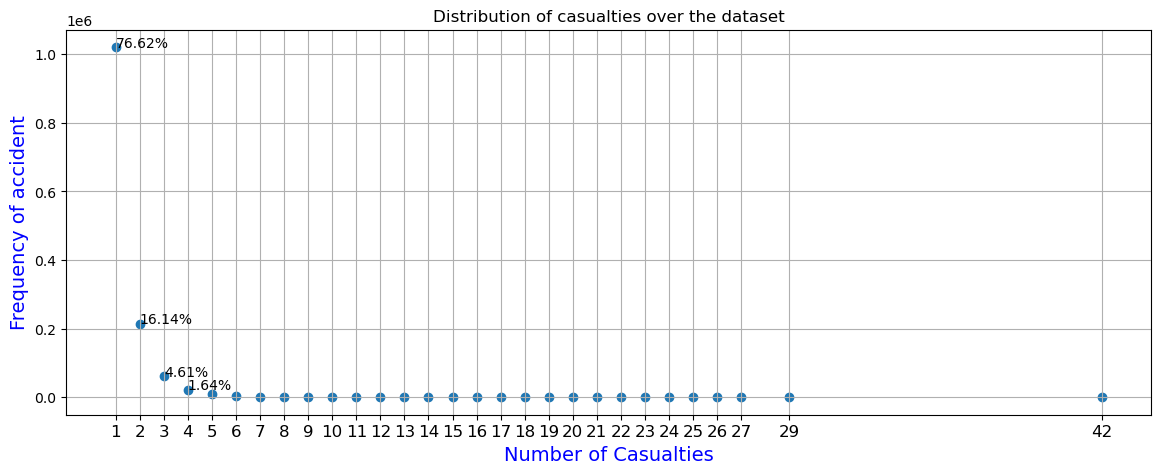

In [45]:
# Based on the above distribution query result, we have 48 unique response values
# The data is not balanced, we should apply the data balancing technique to get better results
# 1. Thus, to balance the data, each response value should have at least three observations.
# 2. And each observation should be meaningful to represent it. but -1 is missing information. so we removed observation which 
     # contains -1 (missing value)

# Based on the criteria-1 mentioned we will have the following list
arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,26,19,29,22, 23,24, 42, 25, 20,27]

#Filtering
lists = distribution[distribution['Number_of_Casualties'].isin(arr)].sort_values(by ='Number_of_Casualties', ascending=True, ignore_index=True)

#Daata label
label=[]
total=sum(list(lists['counts']))
for i, j in lists.iterrows():
    value=round((j[1]/total)*100, 2)
    if(value<1):
        label.append("")
    else:
        label.append(str(value)+ "%")

#Distributions of the data 
plt.figure(figsize=(14,5))
#fig, ax = plt.subplots()
#plt.plot(time['Time'], time['counts'])
plt.scatter(x=lists['Number_of_Casualties'], y=lists['counts'])
#plt.plot(lists['Number_of_Casualties'], lists['counts'], '--m', label="xx")
#plt.legend(loc='best')
plt.title('Distribution of casualties over the dataset')
plt.xlabel('Number of Casualties', color='#0000ff', fontsize=14)
plt.ylabel('Frequency of accident', color='#0000ff', fontsize=14)

for i, txt in enumerate(label):
    plt.annotate(txt, (lists['Number_of_Casualties'][i], lists['counts'][i]))
plt.xticks(arr, fontsize=12)
plt.grid()
plt.show()
xy =data[(data != -1).all(axis=1)]